<a href="https://colab.research.google.com/github/invarrow/dk-tech/blob/main/sms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [2]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 63.0MB/s]


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [6]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [8]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [9]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [10]:
y_pred = model.predict(X_test_tfidf)

In [11]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



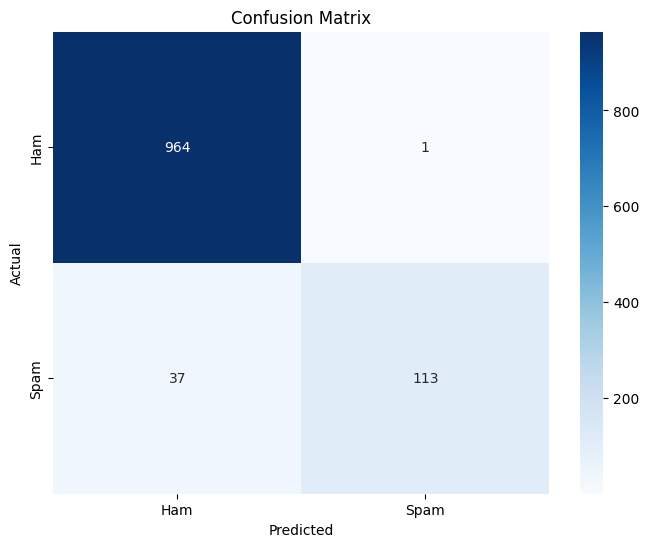

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
def predict_message(message):
    message_tfidf = vectorizer.transform([message])
    prediction = model.predict(message_tfidf)[0]
    return 'spam' if prediction == 1 else 'ham'


example_message = "Congratulations! You've won a $1000 gift card. Click here to claim your prize."
print(f"Message: {example_message}")
print(f"Prediction: {predict_message(example_message)}")

example_message = "Hey, are we still on for dinner tonight?"
print(f"Message: {example_message}")
print(f"Prediction: {predict_message(example_message)}")

Message: Congratulations! You've won a $1000 gift card. Click here to claim your prize.
Prediction: spam
Message: Hey, are we still on for dinner tonight?
Prediction: ham


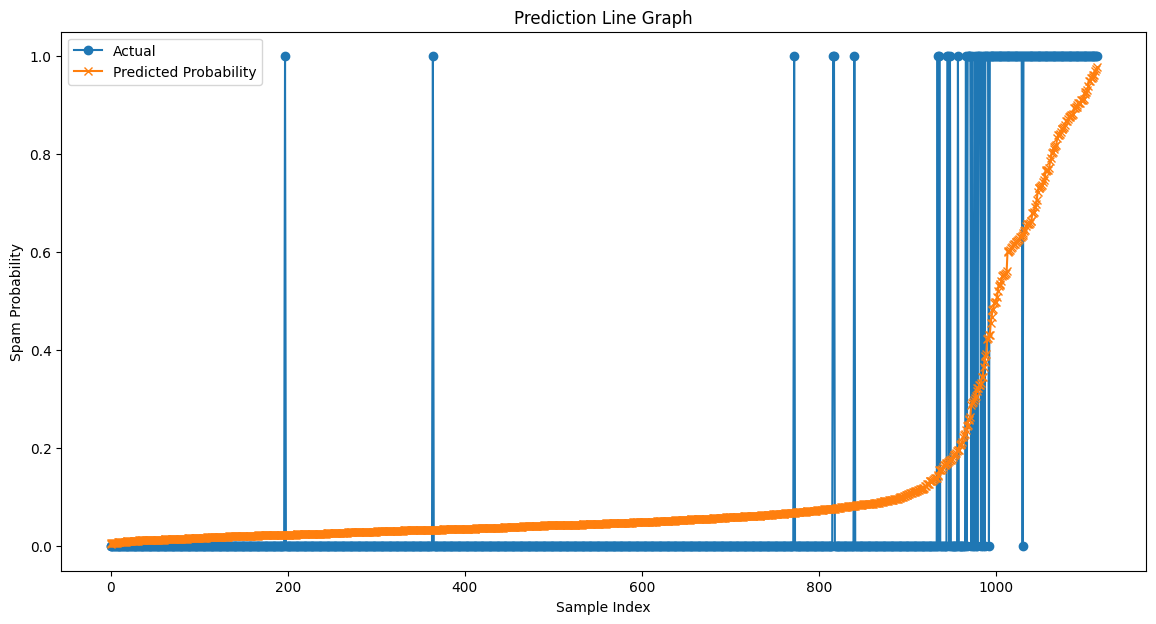

In [14]:
import numpy as np

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test_tfidf)[:, 1]

# Generate a sequence for the x-axis
x_axis = np.arange(len(y_test))

# Sort the true labels and predicted probabilities for plotting
sorted_indices = np.argsort(y_prob)
y_test_sorted = y_test.values[sorted_indices]
y_prob_sorted = y_prob[sorted_indices]

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(x_axis, y_test_sorted, label='Actual', linestyle='-', marker='o')
plt.plot(x_axis, y_prob_sorted, label='Predicted Probability', linestyle='-', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Spam Probability')
plt.title('Prediction Line Graph')
plt.legend()
plt.show()
